In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import os
from os import path, getcwd, listdir, mkdir
import torch as t

import sys
sys.path.insert(0, '../../fhn_model')
from diffusion_gumbel import diffuse_STE
from reaction_diff import  rho_STE
from tqdm import tqdm

In [2]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb} \n \\usepackage{color}"

In [3]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

In [4]:
data_path = path.join(getcwd(), "data_new")
k123_path = path.join(data_path, "k123")
dadb_path = path.join(data_path, "dadb")
k123_dadb_path = path.join(data_path, "k123_dadb")

In [5]:
results = np.load("./data/results.npy")
results.shape
df = pd.DataFrame(results)

FileNotFoundError: [Errno 2] No such file or directory: './data/results.npy'

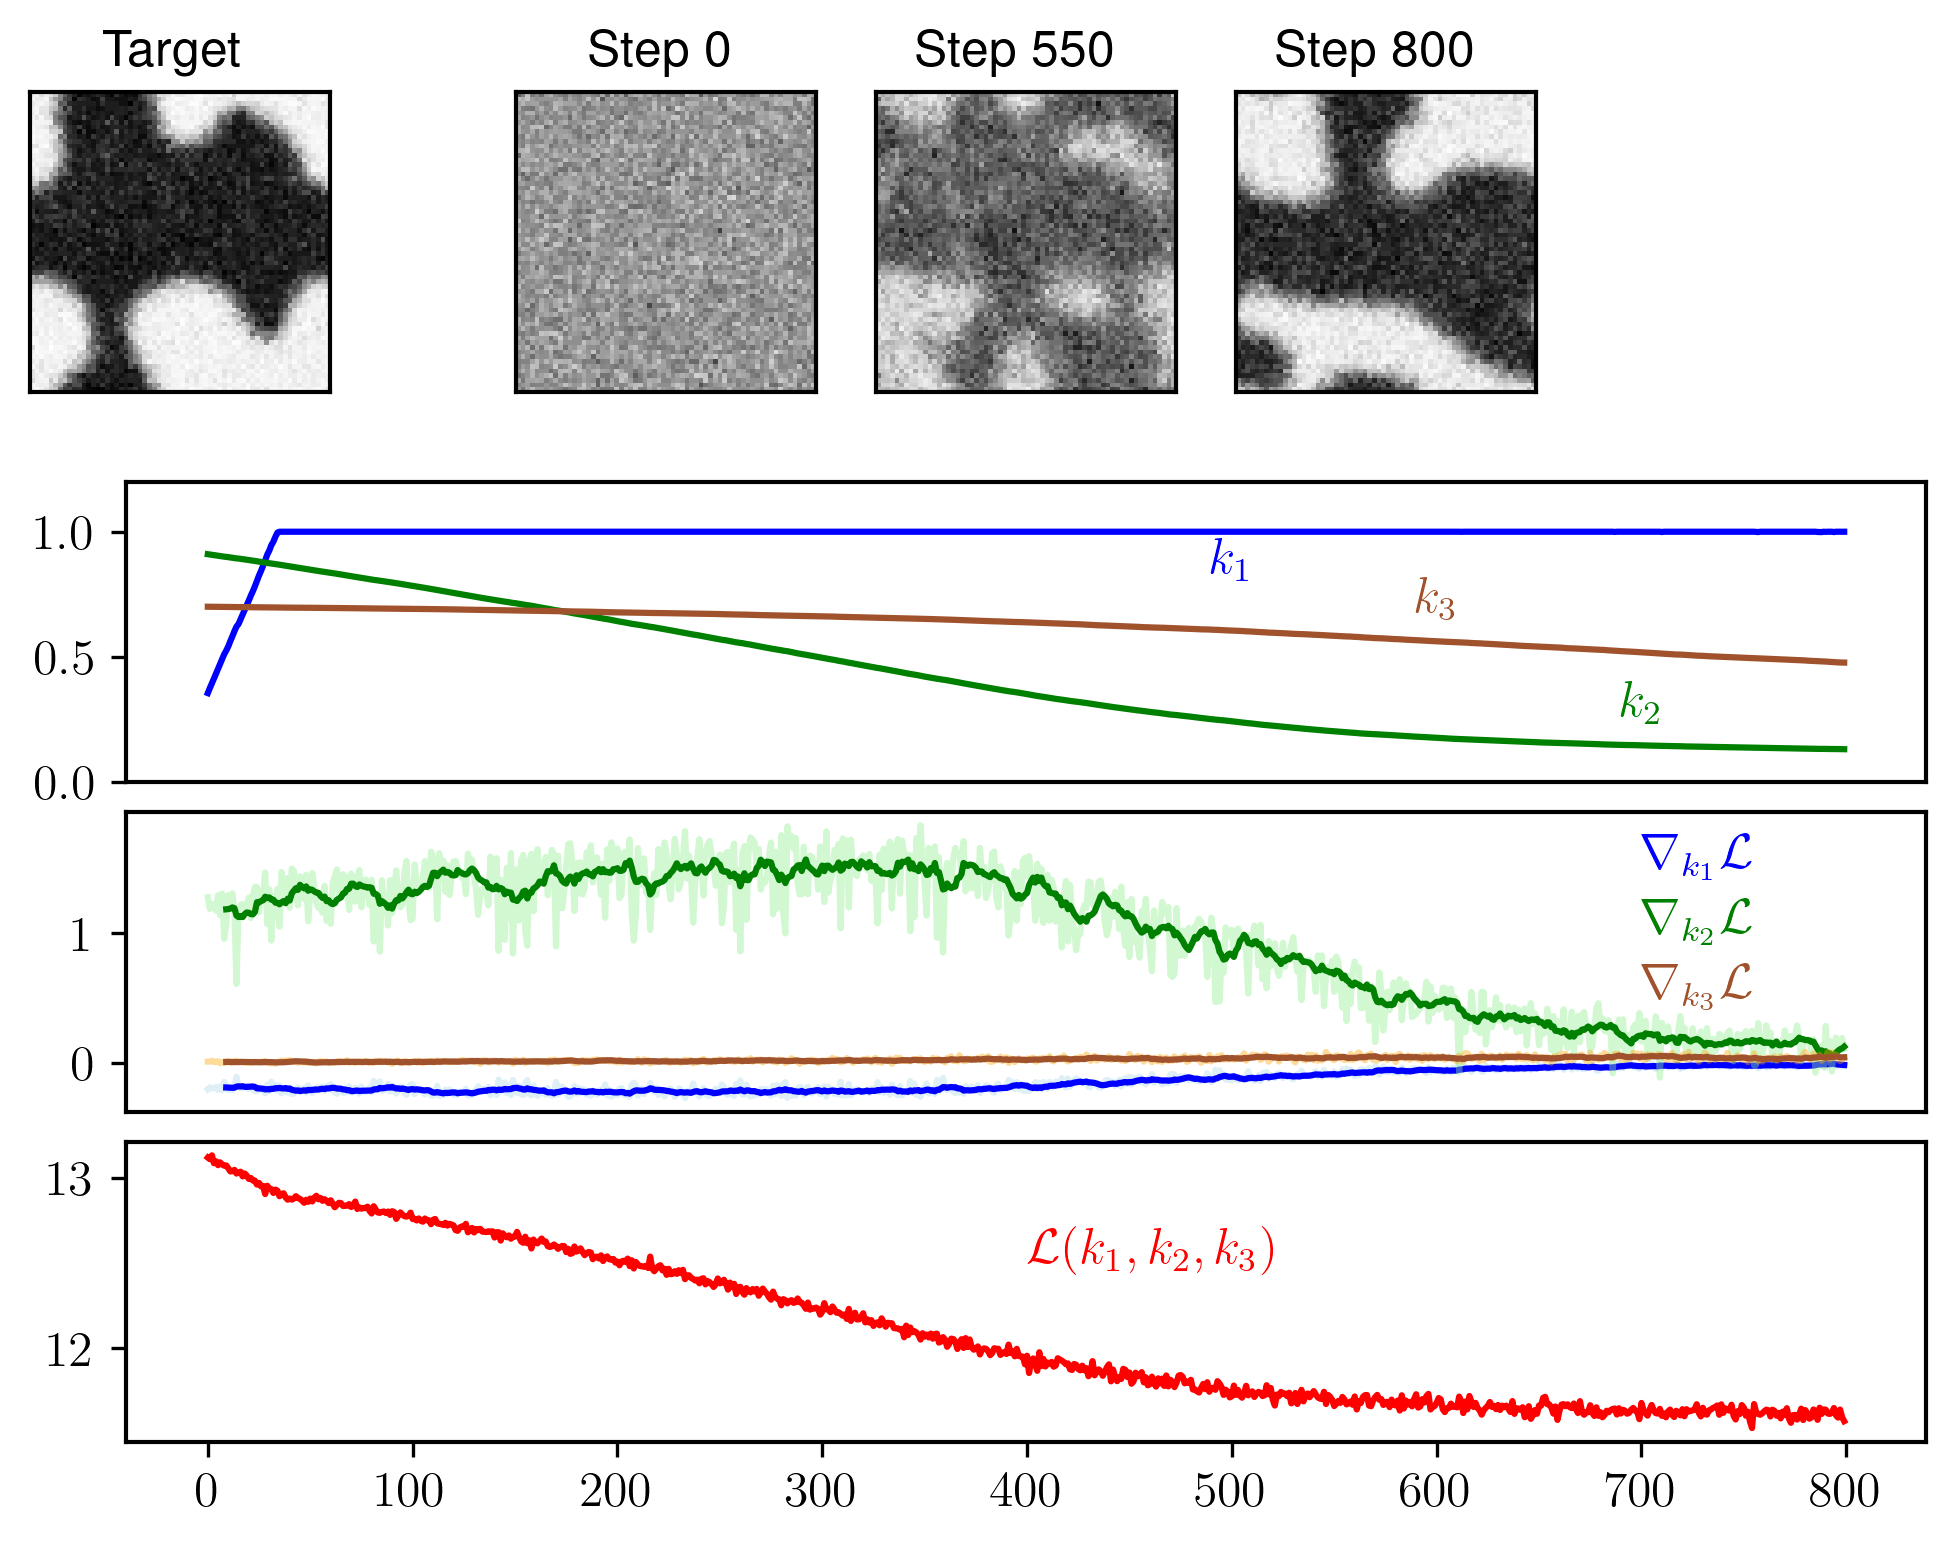

In [206]:
fig = plt.figure(figsize=(6,5), dpi=300)
#frame = fig.add_axes([0,0,1,1])
#remove_ticklines(frame)


res_ax = fig.add_axes([0,0.44,1,0.2])
num_steps = 800
k1_vals = pd.DataFrame(np.load(path.join(k123_path, "k1_vals.npy")))
#res_ax.plot(k1_vals.iloc[:num_steps], 'lightblue', alpha=0.4)
res_ax.plot(k1_vals.iloc[:num_steps], 'b')
k2_vals = pd.DataFrame(np.load(path.join(k123_path, "k2_vals.npy")))
#res_ax.plot(k2_vals.iloc[:num_steps], 'lightgreen', alpha=0.4)
res_ax.plot(k2_vals.iloc[:num_steps], 'g')
k3_vals = pd.DataFrame(np.load(path.join(k123_path, "k3_vals.npy")))
#res_ax.plot(k3_vals.iloc[:num_steps], 'orange', alpha=0.4)
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna')
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.annotate(
    "$k_1$",
    (500, k1_vals.iloc[499]),
    textcoords="offset points", # how to position the text
    xytext=(0,-10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="b"
)
res_ax.annotate(
    "$k_2$",
    (700, k2_vals.iloc[699]),
    textcoords="offset points", # how to position the text
    xytext=(0,7), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="g"
)
res_ax.annotate(
    "$k_3$",
    (600, k3_vals.iloc[599]),
    textcoords="offset points", # how to position the text
    xytext=(0,7), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="sienna"
)
res_ax.set_ylim(0,1.2)

grads_ax = fig.add_axes([0,0.22,1,0.2])
grads_k1 = pd.DataFrame(np.load(path.join(k123_path, "grads_k1.npy")))
grads_ax.plot(grads_k1.iloc[:num_steps], 'lightblue', alpha=0.4)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(10).mean(), 'b')
grads_k2 = pd.DataFrame(np.load(path.join(k123_path, "grads_k2.npy")))
grads_ax.plot(grads_k2.iloc[:num_steps], 'lightgreen', alpha=0.4)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(10).mean(), 'g')
grads_k3 = pd.DataFrame(np.load(path.join(k123_path, "grads_k3.npy")))
grads_ax.plot(grads_k3.iloc[:num_steps], 'orange', alpha=0.4)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(10).mean(), 'sienna')
for tic in grads_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
grads_ax.text(
    700,1.5,
    r"$\nabla_{k_1}\mathcal{L}$",
    color="b"
)
grads_ax.text(
    700,1.,
    r"$\nabla_{k_2}\mathcal{L}$",
    color="g"
)
grads_ax.text(
    700,0.5,
    r"$\nabla_{k_3}\mathcal{L}$",
    color="sienna"
)

losses_ax = fig.add_axes([0,0.,1,0.2])
losses = np.load(path.join(k123_path, "losses.npy"))
losses_ax.plot(losses[:num_steps], color="red")
losses_ax.text(
    400,12.5,
    r"$\mathcal{L}(k_1,k_2,k_3)$",
    color="red"
)

tref_ax = fig.add_axes([-0.07,0.7,0.2,0.2])
tref = t.load(path.join(k123_path, "0.pt")).cpu()
tref_ax.imshow(tref[0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(tref_ax)
tref_ax.text(
    15,-6,
    "Target",
    clip_on=False
)

t0_ax = fig.add_axes([0.2,0.7,0.2,0.2])
t0 = np.load(path.join(k123_path, "grids", "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    15,-6,
    "Step 0",
    clip_on=False
)

t1_ax = fig.add_axes([0.4,0.7,0.2,0.2])
t1 = np.load(path.join(k123_path, "grids", "stable_t550.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    8,-6,
    "Step 550",
    clip_on=False
)

t2_ax = fig.add_axes([0.6,0.7,0.2,0.2])
t2 = np.load(path.join(k123_path, "grids", "stable_t800.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    8,-6,
    "Step 800",
    clip_on=False
)

plt.show()

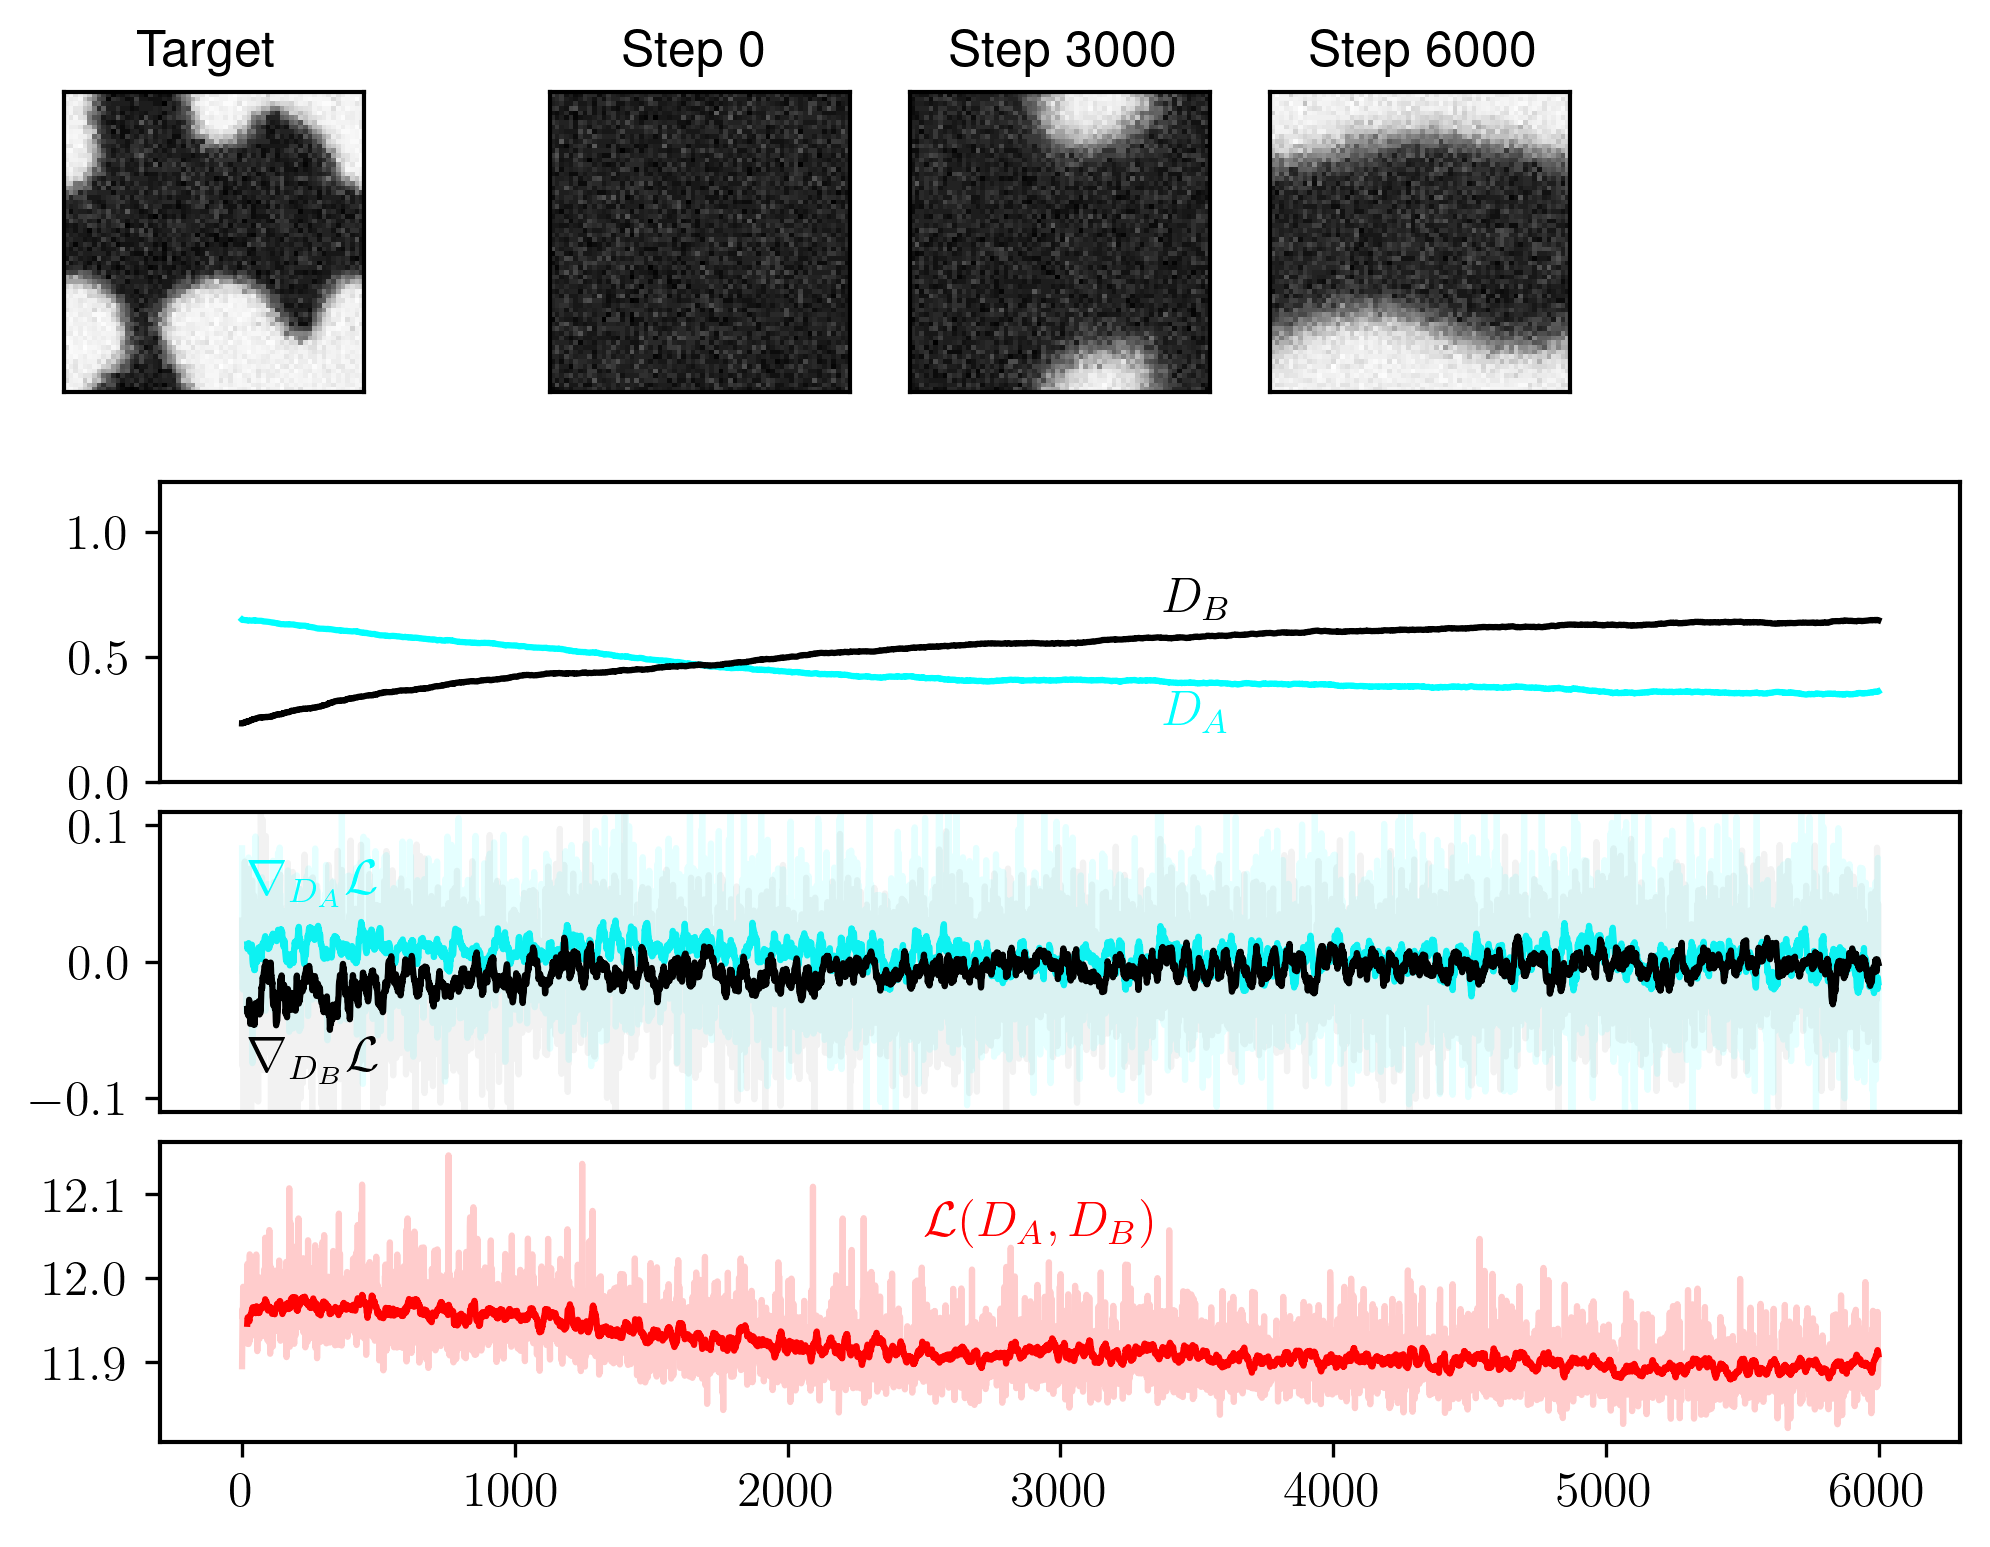

In [219]:

fig = plt.figure(figsize=(6,5), dpi=300)
#frame = fig.add_axes([0,0,1,1])
#remove_ticklines(frame)


res_ax = fig.add_axes([0,0.44,1,0.2])
num_steps = 6000
da_vals = pd.DataFrame(np.load(path.join(dadb_path, "da_vals.npy")))
res_ax.plot(da_vals.iloc[:num_steps], 'cyan')
db_vals = pd.DataFrame(np.load(path.join(dadb_path, "db_vals.npy")))
res_ax.plot(db_vals.iloc[:num_steps], 'black')
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.set_ylim(0,1.2)
res_ax.annotate(
    "$D_A$",
    (3500, da_vals.iloc[3499]),
    textcoords="offset points", # how to position the text
    xytext=(0,-10), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="cyan"
)
res_ax.annotate(
    "$D_B$",
    (3500, db_vals.iloc[3499]),
    textcoords="offset points", # how to position the text
    xytext=(0,6), # distance from text to points (x,y)
    ha='center', # horizontal alignment can be left, right or center
    color="black"
)   

grads_ax = fig.add_axes([0,0.22,1,0.2])
grads_da = pd.DataFrame(np.load(path.join(dadb_path, "grads_DA.npy")))
grads_ax.plot(grads_da.iloc[:num_steps], 'cyan', alpha=0.1)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(20).mean(), 'cyan')
grads_db = pd.DataFrame(np.load(path.join(dadb_path, "grads_DB.npy")))
grads_ax.plot(grads_db.iloc[:num_steps], 'gray', alpha=0.1)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(20).mean(), 'black')
grads_ax.set_ylim(-0.11,0.11)
for tic in grads_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
grads_ax.text(
    20,0.05,
    r"$\nabla_{D_A}\mathcal{L}$",
    color="cyan"
)
grads_ax.text(
    20,-0.08,
    r"$\nabla_{D_B}\mathcal{L}$",
    color="black"
)

losses_ax = fig.add_axes([0,0.,1,0.2])
losses = pd.DataFrame(np.load(path.join(dadb_path, "losses.npy")))
losses_ax.plot(losses.iloc[:num_steps], color="red", alpha=0.2)
losses_ax.plot(losses.iloc[:num_steps].rolling(20).mean(), color="red")
losses_ax.text(
    2500,12.05,
    r"$\mathcal{L}(D_A,D_B)$",
    color="red"
)
tref_ax = fig.add_axes([-0.07,0.7,0.2,0.2])
tref = t.load(path.join(dadb_path, "0.pt")).cpu()
tref_ax.imshow(tref[0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(tref_ax)
tref_ax.text(
    15,-6,
    "Target",
    clip_on=False
)

t0_ax = fig.add_axes([0.2,0.7,0.2,0.2])
t0 = np.load(path.join(dadb_path, "grids", "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    15,-6,
    "Step 0",
    clip_on=False
)

t1_ax = fig.add_axes([0.4,0.7,0.2,0.2])
t1 = np.load(path.join(dadb_path, "grids", "stable_t7000.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    8,-6,
    "Step 3000",
    clip_on=False
)

t2_ax = fig.add_axes([0.6,0.7,0.2,0.2])
t2 = np.load(path.join(dadb_path, "grids", "stable_t14000.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    8,-6,
    "Step 6000",
    clip_on=False
)
    
plt.show()

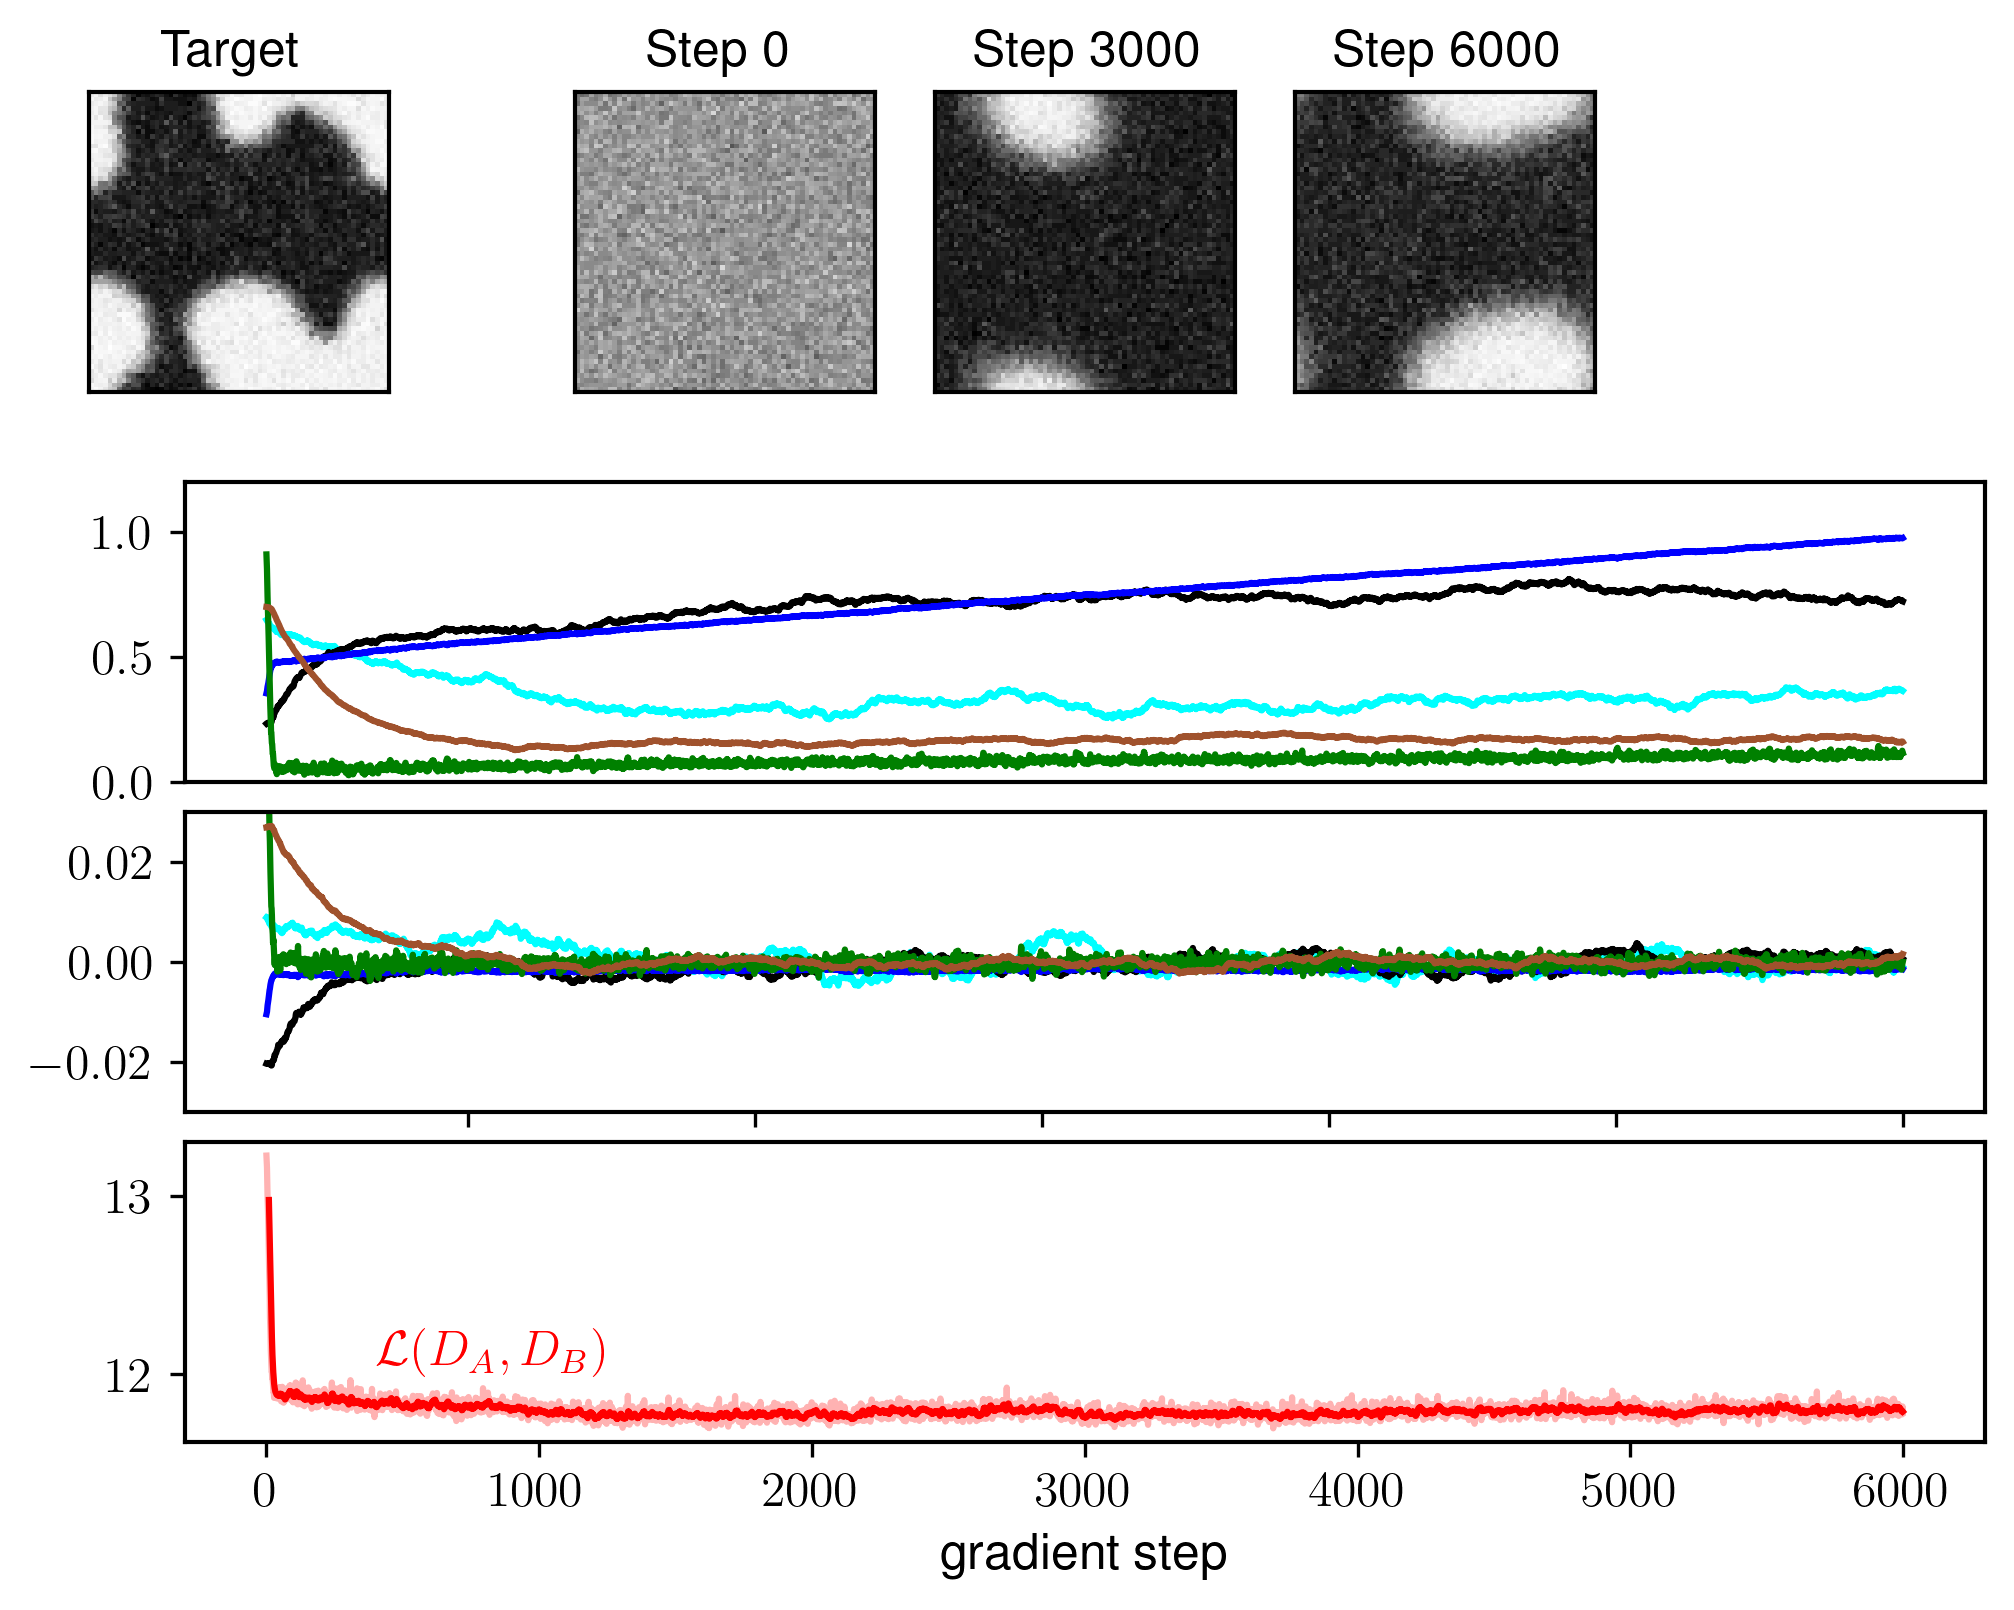

In [190]:
fig = plt.figure(figsize=(6,5), dpi=300)
#frame = fig.add_axes([0,0,1,1])
#remove_ticklines(frame)


res_ax = fig.add_axes([0,0.44,1,0.2])
num_steps = 6_000
da_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "da_vals.npy")))
res_ax.plot(da_vals.iloc[:num_steps], 'cyan')
db_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "db_vals.npy")))
res_ax.plot(db_vals.iloc[:num_steps], 'black')
k1_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k1_vals.npy")))
res_ax.plot(k1_vals.iloc[:num_steps], 'b')
k2_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k2_vals.npy")))
res_ax.plot(k2_vals.iloc[:num_steps], 'g')
k3_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k3_vals.npy")))
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna')
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.set_ylim(0,1.2)

grads_ax = fig.add_axes([0,0.22,1,0.2])
grads_da = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_DA.npy")))
#grads_ax.plot(grads_da.iloc[:num_steps], 'cyan', alpha=0.1)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(300).mean(), 'cyan')
grads_db = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_DB.npy")))
#grads_ax.plot(grads_db.iloc[:num_steps], 'gray', alpha=0.1)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(300).mean(), 'black')
grads_k1 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k1.npy")))
#grads_ax.plot(grads_k1.iloc[:num_steps], 'lightblue', alpha=0.4)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(300).mean(), 'b')
grads_k2 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k2.npy")))
#grads_ax.plot(grads_k2.iloc[:num_steps], 'lightgreen', alpha=0.4)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(300).mean(), 'g')
grads_k3 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k3.npy")))
#grads_ax.plot(grads_k3.iloc[:num_steps], 'orange', alpha=0.4)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(300).mean(), 'sienna')
grads_ax.set_ylim(-0.03,0.03)


losses_ax = fig.add_axes([0,0.,1,0.2])
losses = pd.DataFrame(np.load(path.join(k123_dadb_path, "losses.npy")))
losses_ax.plot(losses.iloc[:num_steps], color="red", alpha=0.3)
losses_ax.plot(losses.iloc[:num_steps].rolling(10).mean(), color="red")
losses_ax.text(
    400,12.05,
    r"$\mathcal{L}(D_A,D_B)$",
    color="red"
)
losses_ax.set_xlabel("gradient step")

tref_ax = fig.add_axes([-0.07,0.7,0.2,0.2])
tref = t.load(path.join(k123_dadb_path, "0.pt")).cpu()
tref_ax.imshow(tref[0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(tref_ax)
tref_ax.text(
    15,-6,
    "Target",
    clip_on=False
)

t0_ax = fig.add_axes([0.2,0.7,0.2,0.2])
t0 = np.load(path.join(k123_dadb_path, "grids", "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    15,-6,
    "Step 0",
    clip_on=False
)

t1_ax = fig.add_axes([0.4,0.7,0.2,0.2])
t1 = np.load(path.join(k123_dadb_path, "grids", "stable_t3000.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    8,-6,
    "Step 3000",
    clip_on=False
)

t2_ax = fig.add_axes([0.6,0.7,0.2,0.2])
t2 = np.load(path.join(k123_dadb_path, "grids", "stable_t6000.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    8,-6,
    "Step 6000",
    clip_on=False
)

plt.show()

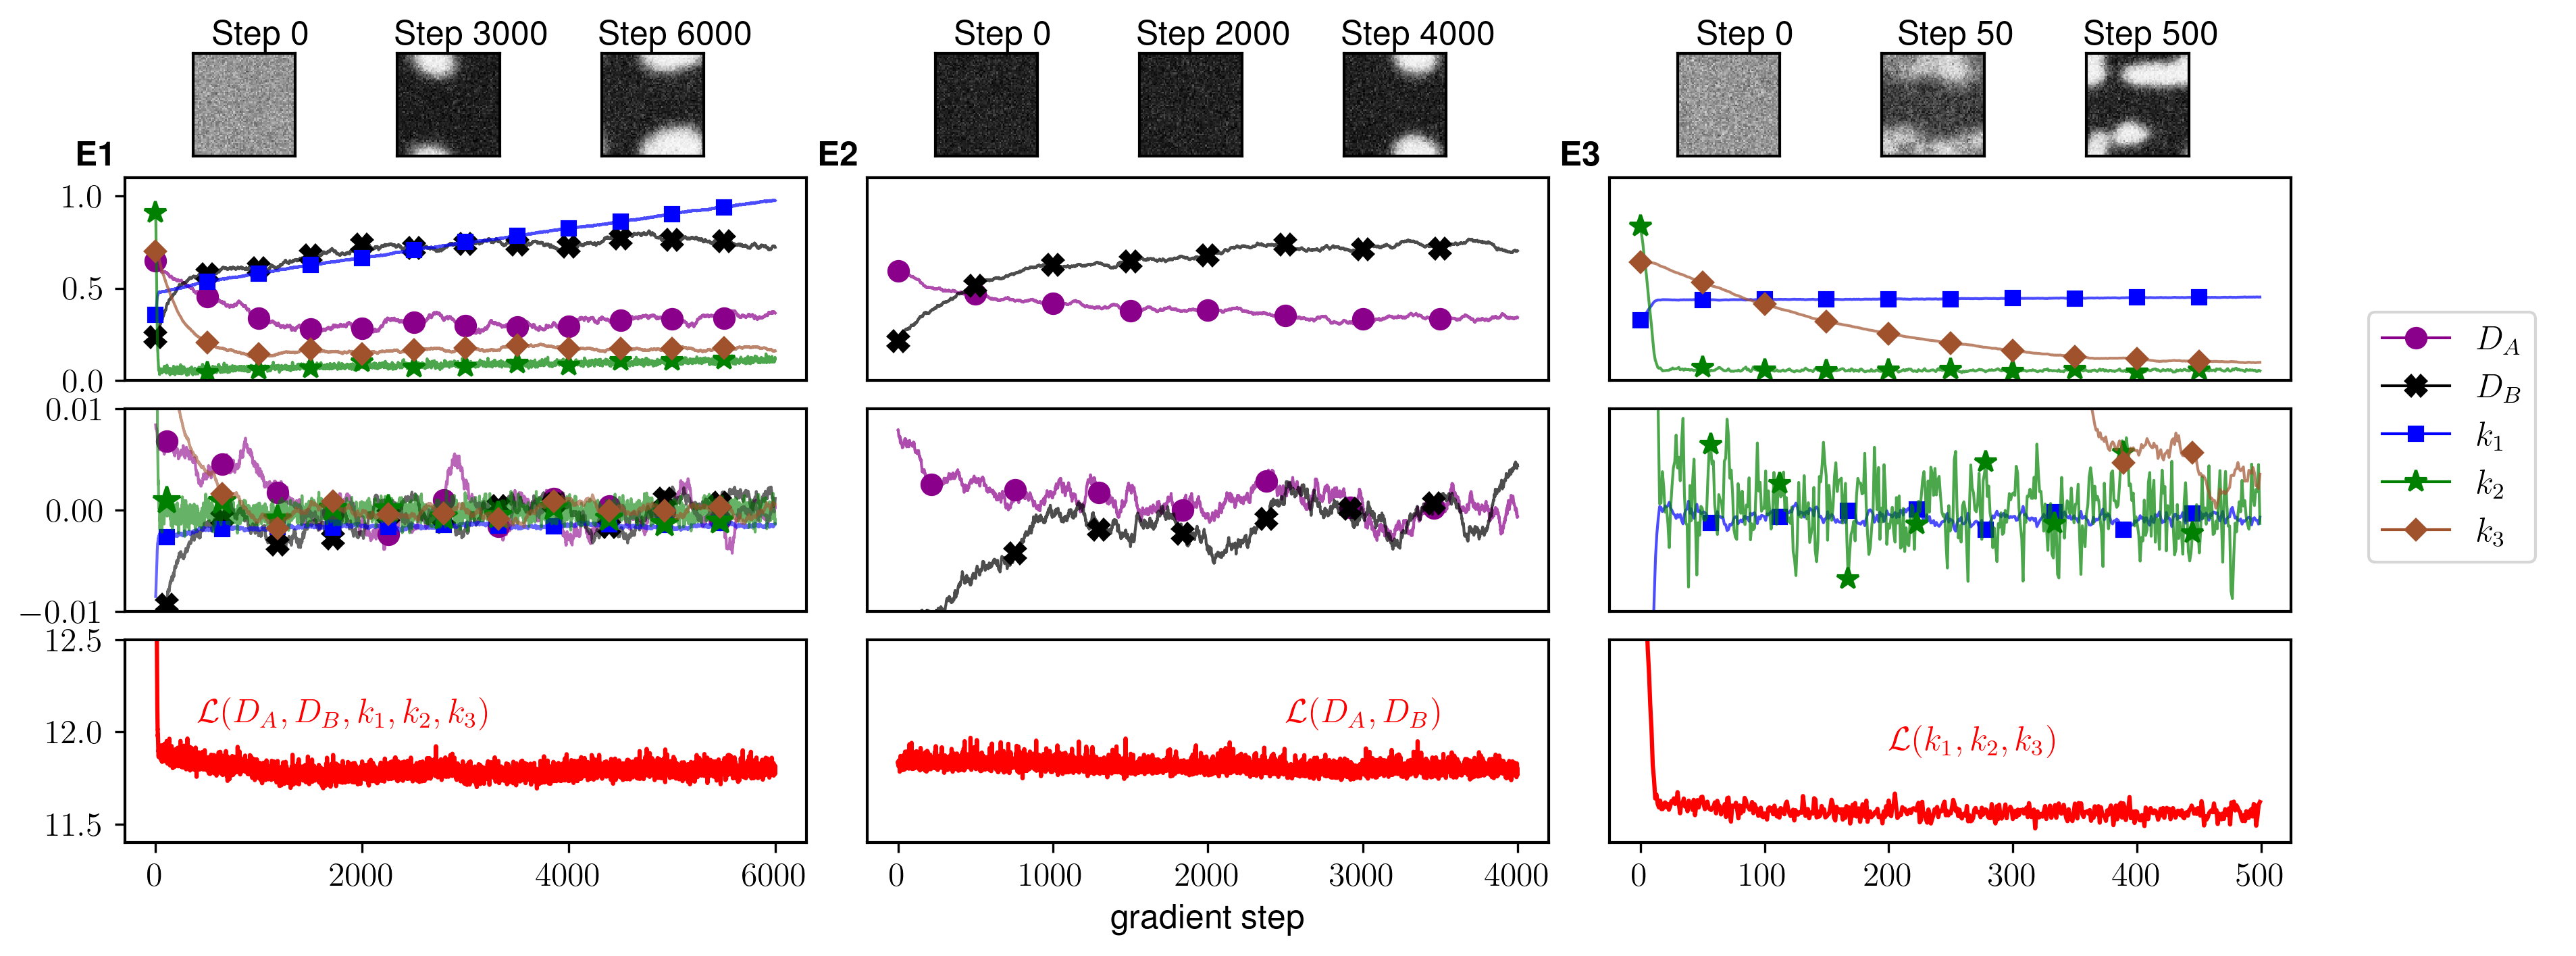

In [83]:
fig = plt.figure(layout="constrained", figsize=(12,4), dpi=300)

subfigs = fig.subfigures(1,4, wspace=0.1, width_ratios=[1,1,1,0.3])

joint_optim = subfigs[0]

k123_dadb_path = path.join(data_path, "k123_dadb")

ylim_loss = (11.4,12.5)
ylim_grads = (-0.01,0.01)

res_ax = joint_optim.add_axes([0,0.57,1,0.25])
num_steps = 6_000
da_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "DA_vals.npy")))
res_ax.plot(da_vals.iloc[:num_steps], 'darkmagenta', lw=1, alpha=0.7)
res_ax.plot(da_vals.iloc[:num_steps], 'darkmagenta', lw=0, marker="o", markersize=7, markevery=500)
db_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "DB_vals.npy")))
res_ax.plot(db_vals.iloc[:num_steps], 'black', lw=1, alpha=0.7)
res_ax.plot(db_vals.iloc[:num_steps], 'black', marker="X", lw=0, markersize=7, markevery=500)
k1_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k1_vals.npy")))
res_ax.plot(k1_vals.iloc[:num_steps], 'b', lw=1, alpha=0.7)
res_ax.plot(k1_vals.iloc[:num_steps], 'b', lw=0, marker="s", markersize=5, markevery=500)
k2_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k2_vals.npy")))
res_ax.plot(k2_vals.iloc[:num_steps], 'g', lw=1, alpha=0.7)
res_ax.plot(k2_vals.iloc[:num_steps], 'g', lw=0, marker="*", markersize=8, markevery=500)
k3_vals = pd.DataFrame(np.load(path.join(k123_dadb_path, "k3_vals.npy")))
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna', lw=1, alpha=0.7)
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna', lw=0, marker="D", markersize=5, markevery=500)
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.set_ylim(0,1.1)


grads_ax = joint_optim.add_axes([0,0.285,1,0.25])
grads_da = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_DA.npy")))
#grads_ax.plot(grads_da.iloc[:num_steps], 'cyan', alpha=0.1)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(400).mean(), 'darkmagenta', lw=1, alpha=0.6)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(400).mean(), 'darkmagenta', lw=0, marker="o", markersize=7, markevery=500)
grads_db = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_DB.npy")))
#grads_ax.plot(grads_db.iloc[:num_steps], 'gray', alpha=0.1)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(400).mean(), 'black', lw=1, alpha=0.6)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(400).mean(), 'black', lw=0, marker="X", markersize=7, markevery=500)
grads_k1 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k1.npy")))
#grads_ax.plot(grads_k1.iloc[:num_steps], 'lightblue', alpha=0.4)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(400).mean(), 'b', lw=1, alpha=0.6)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(400).mean(), 'b', lw=0, marker="s", markersize=5, markevery=500)
grads_k2 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k2.npy")))
#grads_ax.plot(grads_k2.iloc[:num_steps], 'lightgreen', alpha=0.4)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(400).mean(), 'g', lw=1, alpha=0.6)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(400).mean(), 'g', lw=0, marker="*", markersize=10, markevery=500)
grads_k3 = pd.DataFrame(np.load(path.join(k123_dadb_path, "grads_k3.npy")))
#grads_ax.plot(grads_k3.iloc[:num_steps], 'orange', alpha=0.4)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(400).mean(), 'sienna', lw=1, alpha=0.6)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(400).mean(), 'sienna', lw=0, marker="D", markersize=5, markevery=500)
grads_ax.set_ylim(ylim_grads)
for tic in grads_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)


losses_ax = joint_optim.add_axes([0,0.,1,0.25])
losses = pd.DataFrame(np.load(path.join(k123_dadb_path, "losses.npy")))
losses_ax.plot(losses.iloc[:num_steps], color="red")
losses_ax.text(
    400,12.05,
    r"$\mathcal{L}(D_A,D_B,k_1,k_2,k_3)$",
    color="red"
)
#losses_ax.set_xlabel("gradient step")
losses_ax.set_ylim(ylim_loss)

t0_ax = joint_optim.add_axes([0.1,0.835,0.15,0.15])
t0 = np.load(path.join(k123_dadb_path, "grids", "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    12,-6,
    "Step 0",
    clip_on=False
)

t1_ax = joint_optim.add_axes([0.4,0.835,0.15,0.15])
t1 = np.load(path.join(k123_dadb_path, "grids", "stable_t3000.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    -2,-6,
    "Step 3000",
    clip_on=False
)

t2_ax = joint_optim.add_axes([0.7,0.835,0.15,0.15])
t2 = np.load(path.join(k123_dadb_path, "grids", "stable_t6000.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    -2,-6,
    "Step 6000",
    clip_on=False
)

##########
######
######      Diffusion Coefficients
######
##########

dadb_optim = subfigs[1]

dadb_path = path.join(getcwd(), "joint_optim_da_db", "res")
k123_path = path.join(getcwd(), "joint_optim_k123", "results")

res_ax = dadb_optim.add_axes([0,0.57,1,0.25])
num_steps = 4_000
da_vals = pd.DataFrame(np.load(path.join(dadb_path, "da_vals.npy")))
res_ax.plot(da_vals.iloc[:num_steps], 'darkmagenta', lw=1, alpha=0.7)
res_ax.plot(da_vals.iloc[:num_steps], 'darkmagenta', lw=0, marker="o", markersize=7, markevery=500)
db_vals = pd.DataFrame(np.load(path.join(dadb_path, "db_vals.npy")))
res_ax.plot(db_vals.iloc[:num_steps], 'black', lw=1, alpha=0.7)
res_ax.plot(db_vals.iloc[:num_steps], 'black', lw=0, marker="X", markersize=7, markevery=500)
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.set_ylim(0,1.2)
   

for tic in res_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)


grads_ax = dadb_optim.add_axes([0,0.285,1,0.25])
grads_da = pd.DataFrame(np.load(path.join(dadb_path, "grads_DA.npy")))
#grads_ax.plot(grads_da.iloc[:num_steps], 'cyan', alpha=0.1)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(300).mean(), 'darkmagenta', lw=1, alpha=0.7)
grads_ax.plot(grads_da.iloc[:num_steps].rolling(300).mean(), 'darkmagenta', lw=0, marker="o", markersize=7, markevery=500)
grads_db = pd.DataFrame(np.load(path.join(dadb_path, "grads_DB.npy")))
#grads_ax.plot(grads_db.iloc[:num_steps], 'gray', alpha=0.1)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(300).mean(), 'black', lw=1, alpha=0.7)
grads_ax.plot(grads_db.iloc[:num_steps].rolling(300).mean(), 'black', lw=0, marker="X", markersize=7, markevery=500)
grads_ax.set_ylim(ylim_grads)
for tic in grads_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
for tic in grads_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

losses_ax = dadb_optim.add_axes([0,0.,1,0.25])
losses = pd.DataFrame(np.load(path.join(dadb_path, "losses.npy")))
losses_ax.plot(losses.iloc[:num_steps], color="red")
losses_ax.text(
    2500,12.05,
    r"$\mathcal{L}(D_A,D_B)$",
    color="red"
)
losses_ax.set_ylim(ylim_loss)
for tic in losses_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
losses_ax.set_xlabel("gradient step")

t0_ax = dadb_optim.add_axes([0.1,0.835,0.15,0.15])
t0 = np.load(path.join(dadb_path, "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    12,-6,
    "Step 0",
    clip_on=False
)

t1_ax = dadb_optim.add_axes([0.4,0.835,0.15,0.15])
t1 = np.load(path.join(dadb_path, "stable_t2000.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    -2,-6,
    "Step 2000",
    clip_on=False
)

t2_ax = dadb_optim.add_axes([0.7,0.835,0.15,0.15])
t2 = np.load(path.join(dadb_path, "stable_t4000.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    -2,-6,
    "Step 4000",
    clip_on=False
)

##########
######
######      Reaction Rates
######
##########

k123_optim = subfigs[2]

res_ax = k123_optim.add_axes([0,0.57,1,0.25])
num_steps = 500
k1_vals = pd.DataFrame(np.load(path.join(k123_path, "k1_vals.npy")))
#res_ax.plot(k1_vals.iloc[:num_steps], 'lightblue', alpha=0.4)
res_ax.plot(k1_vals.iloc[:num_steps], 'b', lw=1, alpha=0.7)
res_ax.plot(k1_vals.iloc[:num_steps], 'b', lw=0, marker="s", markersize=5, markevery=50)
k2_vals = pd.DataFrame(np.load(path.join(k123_path, "k2_vals.npy")))
#res_ax.plot(k2_vals.iloc[:num_steps], 'lightgreen', alpha=0.4)
res_ax.plot(k2_vals.iloc[:num_steps], 'g', lw=1, alpha=0.7)
res_ax.plot(k2_vals.iloc[:num_steps], 'g', lw=0, marker="*", markersize=8, markevery=50)
k3_vals = pd.DataFrame(np.load(path.join(k123_path, "k3_vals.npy")))
#res_ax.plot(k3_vals.iloc[:num_steps], 'orange', alpha=0.4)
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna', lw=1, alpha=0.7)
res_ax.plot(k3_vals.iloc[:num_steps], 'sienna', lw=0, marker="D", markersize=5, markevery=50)
for tic in res_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
res_ax.set_ylim(0,1.2)

for tic in res_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

grads_ax = k123_optim.add_axes([0,0.285,1,0.25])
grads_k1 = pd.DataFrame(np.load(path.join(k123_path, "grads_k1.npy")))
#grads_ax.plot(grads_k1.iloc[:num_steps], 'lightblue', alpha=0.4)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(50).mean(), 'b', lw=1, alpha=0.7)
grads_ax.plot(grads_k1.iloc[:num_steps].rolling(50).mean(), 'b', lw=0, marker="s", markersize=5, markevery=50)
grads_k2 = pd.DataFrame(np.load(path.join(k123_path, "grads_k2.npy")))
#grads_ax.plot(grads_k2.iloc[:num_steps], 'lightgreen', alpha=0.4)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(50).mean(), 'g', lw=1, alpha=0.7)
grads_ax.plot(grads_k2.iloc[:num_steps].rolling(50).mean(), 'g', lw=0, marker="*", markersize=8, markevery=50)
grads_k3 = pd.DataFrame(np.load(path.join(k123_path, "grads_k3.npy")))
#grads_ax.plot(grads_k3.iloc[:num_steps], 'orange', alpha=0.4)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(50).mean(), 'sienna', lw=1, alpha=0.7)
grads_ax.plot(grads_k3.iloc[:num_steps].rolling(50).mean(), 'sienna', lw=0, marker="D", markersize=5, markevery=50)
for tic in grads_ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

grads_ax.set_ylim(ylim_grads)
for tic in grads_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

losses_ax = k123_optim.add_axes([0,0.,1,0.25])
losses = np.load(path.join(k123_path, "losses.npy"))
losses_ax.plot(losses[:num_steps], color="red")
losses_ax.text(
    200,11.9,
    r"$\mathcal{L}(k_1,k_2,k_3)$",
    color="red"
)
losses_ax.set_ylim(ylim_loss)
for tic in losses_ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

t0_ax = k123_optim.add_axes([0.1,0.835,0.15,0.15])
t0 = np.load(path.join(k123_path, "stable_t0.npy"))
t0_ax.imshow(t0[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t0_ax)
t0_ax.text(
    12,-6,
    "Step 0",
    clip_on=False
)

t1_ax = k123_optim.add_axes([0.4,0.835,0.15,0.15])
t1 = np.load(path.join(k123_path, "stable_t50.npy"))
t1_ax.imshow(t1[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t1_ax)
t1_ax.text(
    10,-6,
    "Step 50",
    clip_on=False
)

t2_ax = k123_optim.add_axes([0.7,0.835,0.15,0.15])
t2 = np.load(path.join(k123_path, "stable_t500.npy"))
t2_ax.imshow(t2[0,0], cmap="Greys",interpolation="nearest",vmin=0,vmax=50)
remove_ticklines(t2_ax)
t2_ax.text(
    -2,-6,
    "Step 500",
    clip_on=False
)


joint_optim.text(
    -0.07,0.835,
    r"\textbf{E1}"
)
dadb_optim.text(
    -0.07,0.835,
    r"\textbf{E2}"
)
k123_optim.text(
    -0.07,0.835,
    r"\textbf{E3}"
)

lg_plt = subfigs[3].add_axes([0,0,1,1])
lg_plt.plot([], "darkmagenta", lw=1, marker="o", markersize=7, markevery=500, label=r"$D_A$")
lg_plt.plot([], 'black', lw=1, marker="X", markersize=7, markevery=500, label=r"$D_B$")

lg_plt.plot([], 'b', lw=1, marker="s", markersize=5, markevery=50, label=r"$k_1$")
lg_plt.plot([], 'g', lw=1, marker="*", markersize=8, markevery=50, label=r"$k_2$")
lg_plt.plot([], 'sienna', lw=1, marker="D", markersize=5, markevery=50, label=r"$k_3$")

lg_plt.legend(loc="center left")
lg_plt.axis("off")

plt.show()

# Inferences for Experiment 1

In [18]:
device = t.device("cuda") if t.cuda.is_available() else t.device("cpu")

N = 50
num_steps = 50_000
DA = t.tensor(0.1, device=device)
DB = t.tensor(0.4, device=device)
gamma = 0.005
k1 = t.tensor(0.98, device=device)
k2 = t.tensor(0.1, device=device)
k3 = t.tensor(0.2, device=device)

X = t.zeros((1, 2, 64, 64), device=device)
X[:] = 25
X[0, 0, 29:35] = 40

#plt.imshow(X[0,0].cpu(), cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

for sim_step in tqdm(range(num_steps)):
    # run the diffusion step
    X = diffuse_STE(X, N, DA, DB)
    # run the reaction step
    X = rho_STE(X, N, gamma, k1, k1, k2, k2, k3, k3)

    np.save(f"./states/{sim_step}.npy", X.cpu().numpy())
    

100%|██████████| 50000/50000 [06:48<00:00, 122.25it/s]


In [ ]:
for i in tqdm(range(21880,num_steps)):
    state = np.load(f"./states/{i}.npy")
    plt.imsave(f"./img/{i}.png", state[0,0], cmap="Greys",vmin=0,vmax=50)
    

In [22]:
import imageio
images = []
for i in tqdm(range(30_000)):
    images.append(imageio.imread(f"./img/{i}.png"))

imageio.mimsave("./vis.gif", images)

  0%|          | 0/30000 [00:00<?, ?it/s]C:\Users\jsche\AppData\Local\Temp\ipykernel_9580\419205392.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"./img/{i}.png"))
100%|██████████| 30000/30000 [02:28<00:00, 201.45it/s]
